In [1]:
import pandas as pd
import numpy as np 
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import fasteda
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna as op
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("data/train.csv", index_col=[0])
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
targets = df.iloc[:, 27:]
df["Combined_Faults"] = "Usman"
targets.columns

Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [4]:
for i in range(len(targets)):
    for column in targets.columns:
        if targets[column][i] == True:
            df["Combined_Faults"][i] = column
    

In [5]:
targets.iloc[1, 0:1]

Pastry    0
Name: 1, dtype: int64

In [6]:
targets["Bumps"][0]

0

In [7]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Combined_Faults
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults


In [8]:
df.shape

(19219, 35)

df

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  int64  
 1   X_Maximum              19219 non-null  int64  
 2   Y_Minimum              19219 non-null  int64  
 3   Y_Maximum              19219 non-null  int64  
 4   Pixels_Areas           19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  int64  
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  TypeOfSteel_A300       19219 non-null  int64  
 12  TypeOfSteel_A400       19219 non-null  int64  
 13  Steel_Plate_Thickness  19219 non-null  int64  
 14  Edges_Index            19219 non-null  float64
 15  Empty_I

In [11]:
df.iloc[:, :27].describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000


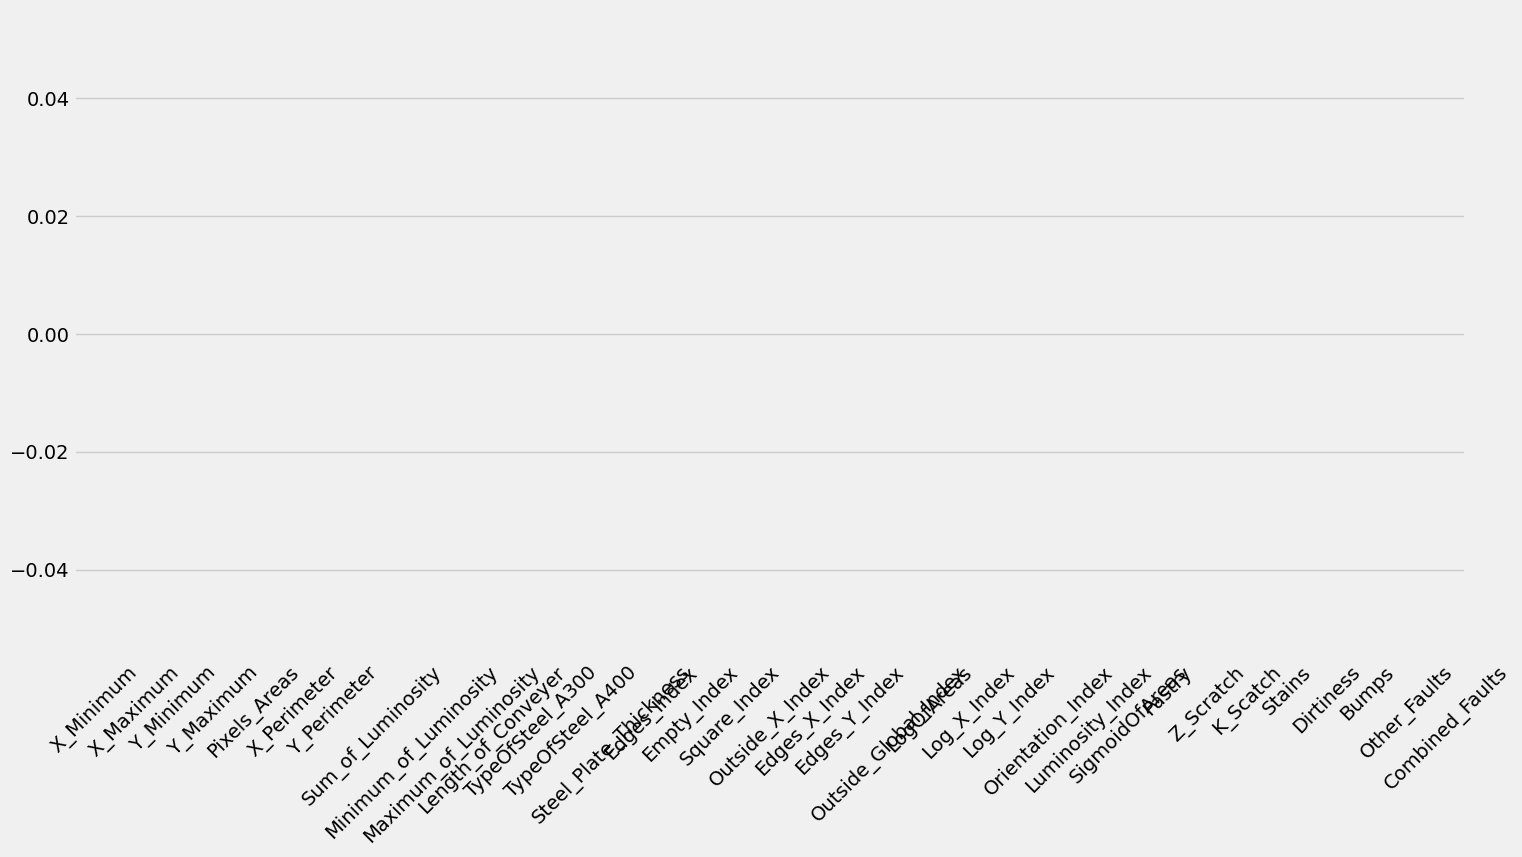

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.isna().sum().index, y=df.isna().sum().values)
plt.xticks(rotation=45)
plt.show()

In [13]:
fast_eda_train = df.drop(targets, axis=1).copy()

label_encoder = LabelEncoder()
fast_eda_target = label_encoder.fit_transform(df['Combined_Faults'])
fast_eda_train['Combined_Faults'] = fast_eda_target

%time

# fasteda.fast_eda(fast_eda_train, target=["Combined_Faults"])

CPU times: total: 0 ns
Wall time: 0 ns


In [14]:
df['Combined_Faults'].value_counts()

Combined_Faults
Other_Faults    6558
Bumps           4763
K_Scatch        3412
Pastry          1465
Z_Scratch       1150
Usman            818
Stains           568
Dirtiness        485
Name: count, dtype: int64

In [15]:
targets.columns

Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'],
      dtype='object')

In [16]:
print(label_encoder.inverse_transform(fast_eda_target))

['Stains' 'Other_Faults' 'K_Scatch' ... 'Pastry' 'Other_Faults' 'Bumps']


In [17]:
dictFrame = pd.DataFrame(index=targets.columns, columns=df.columns[:27])

for column in targets.columns:
    for column2 in df.columns[:27]:
        dictFrame.at[column, column2] = df[column].corr(df[column2])

In [18]:
dictFrame.loc['Pastry'].values


array([0.11930597778728295, 0.10880777806335948, -0.015511973772381943,
       -0.016286610839397177, -0.10129463798038595, -0.10432179293474647,
       -0.06496527811647343, -0.09315978147080929, -0.004622440004638979,
       -0.08609009320587449, 0.1586702960122397, -0.007322463180549612,
       0.007499054316487523, 0.08003697054203605, -0.019326927337206933,
       -0.13362312049230918, -0.15045808353784831, -0.13918439128968646,
       -0.10171992683708657, 0.20177403821909193, 0.2237677041050211,
       -0.06858994189746331, -0.1773033692757165, 0.03654925868077715,
       0.2613023583145951, -0.10342403185217573, -0.04229932569226914],
      dtype=object)

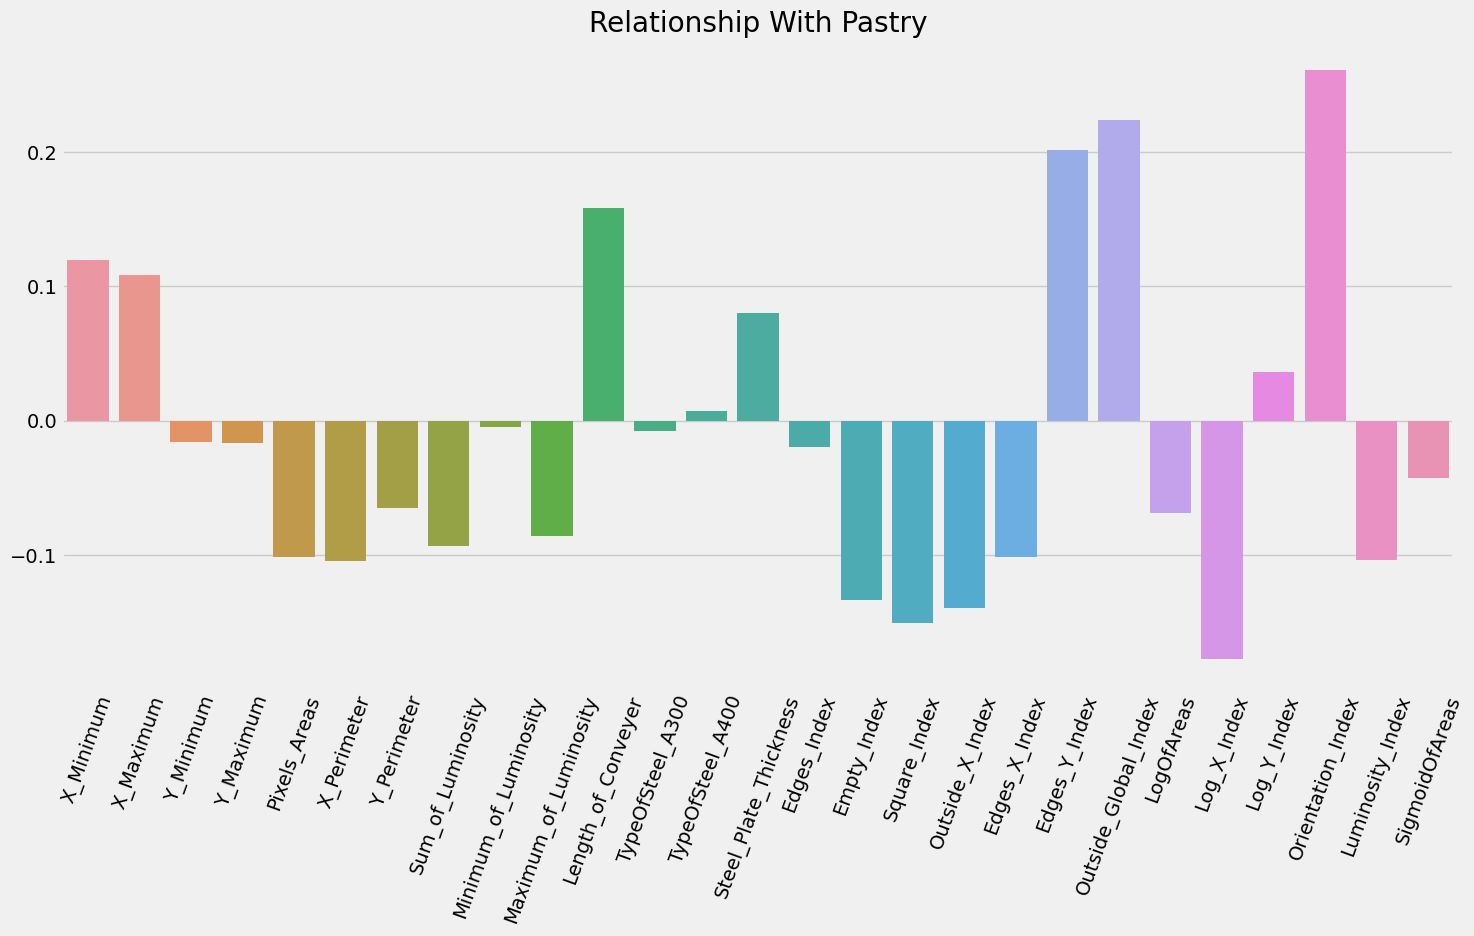

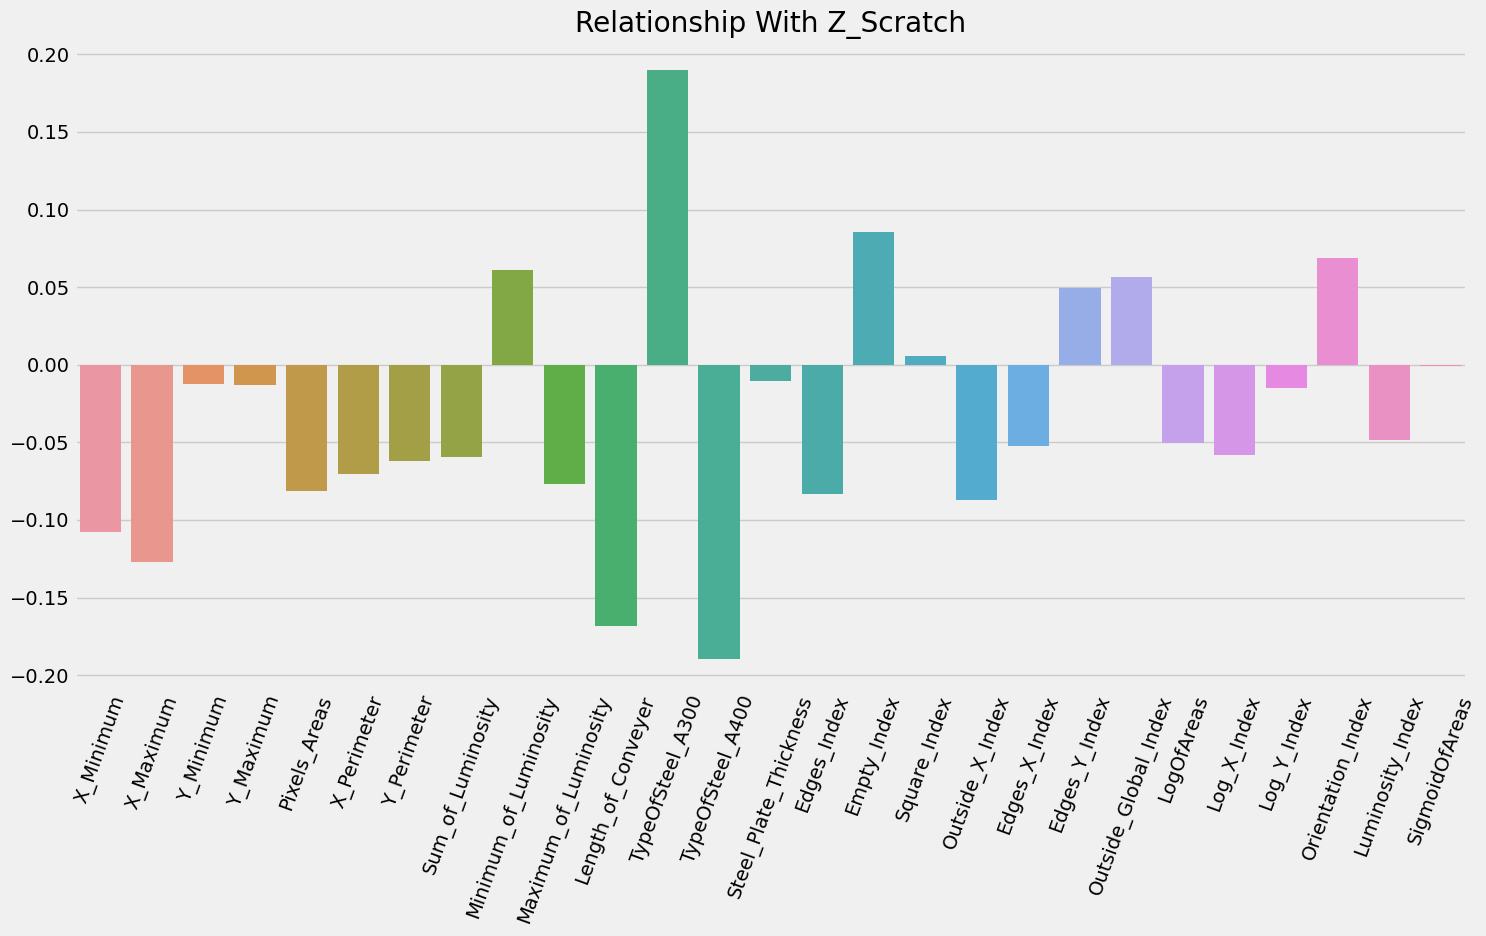

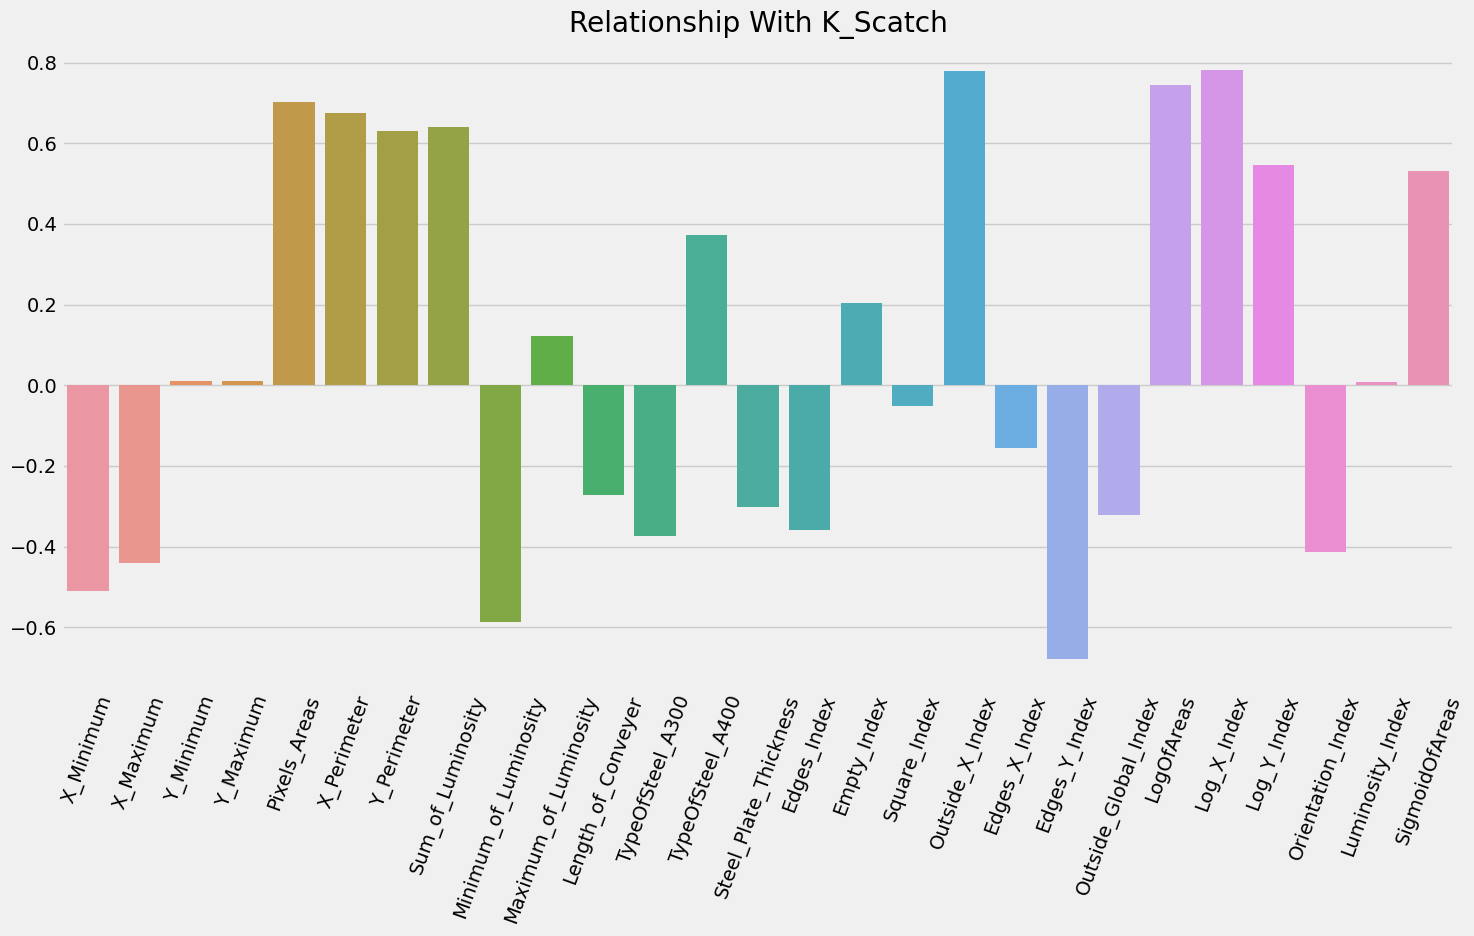

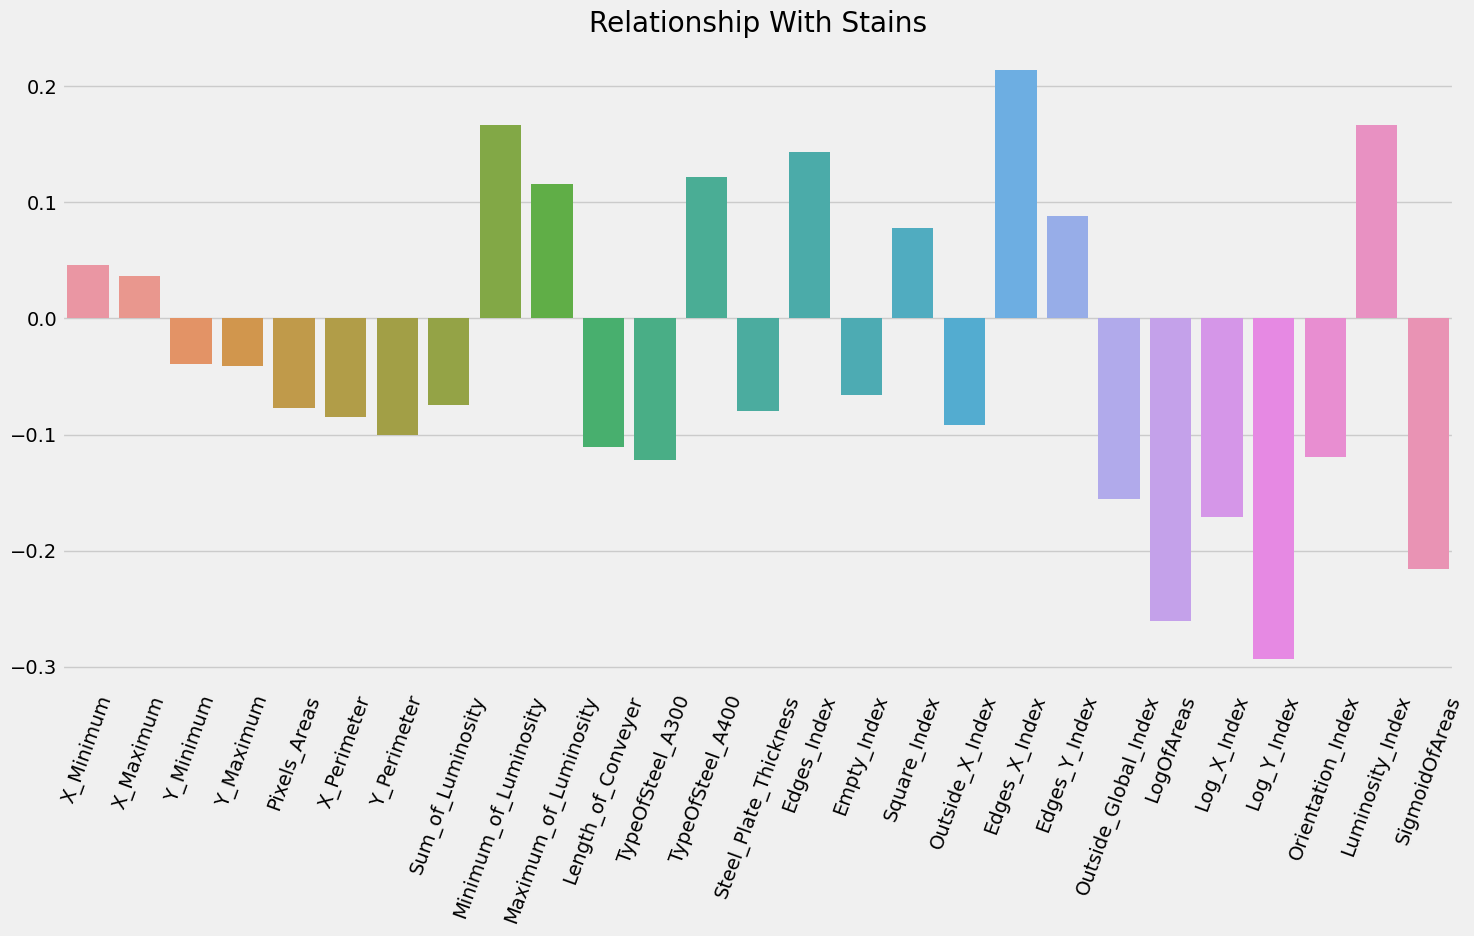

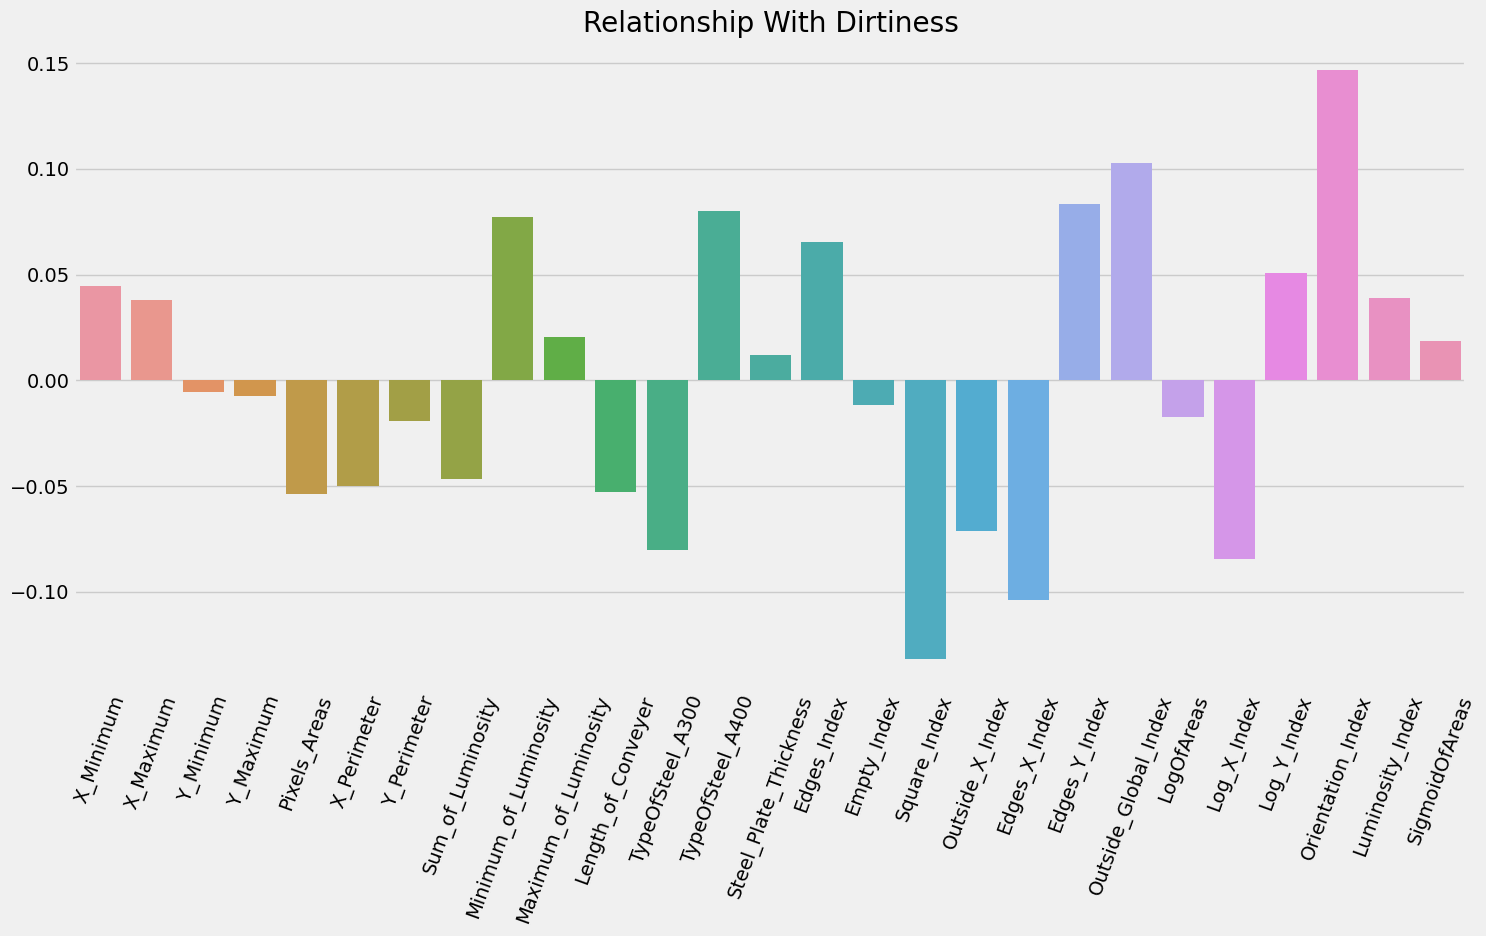

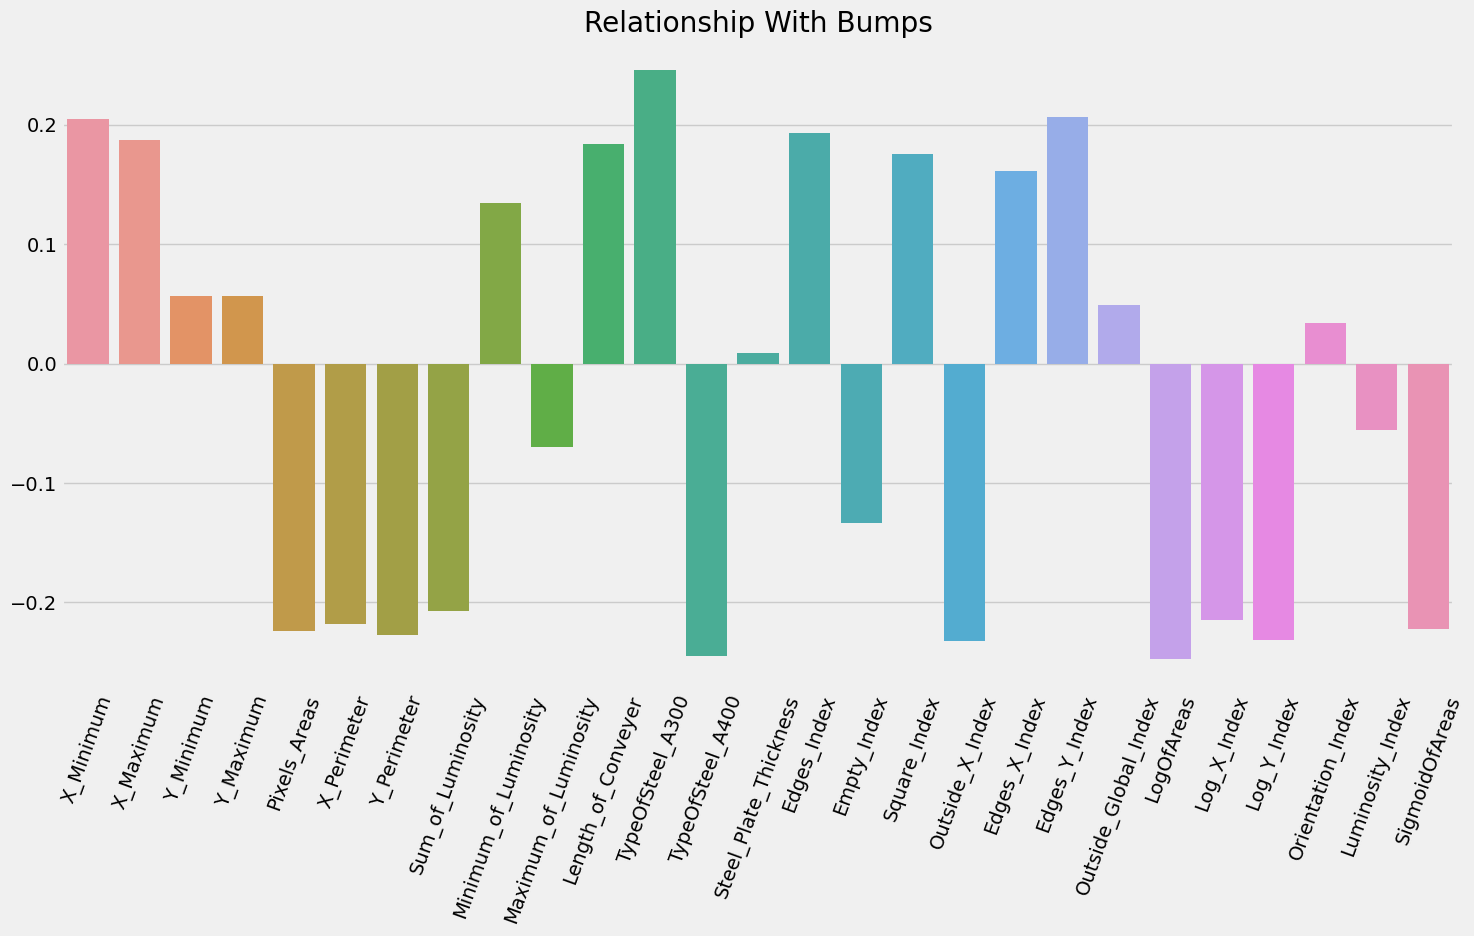

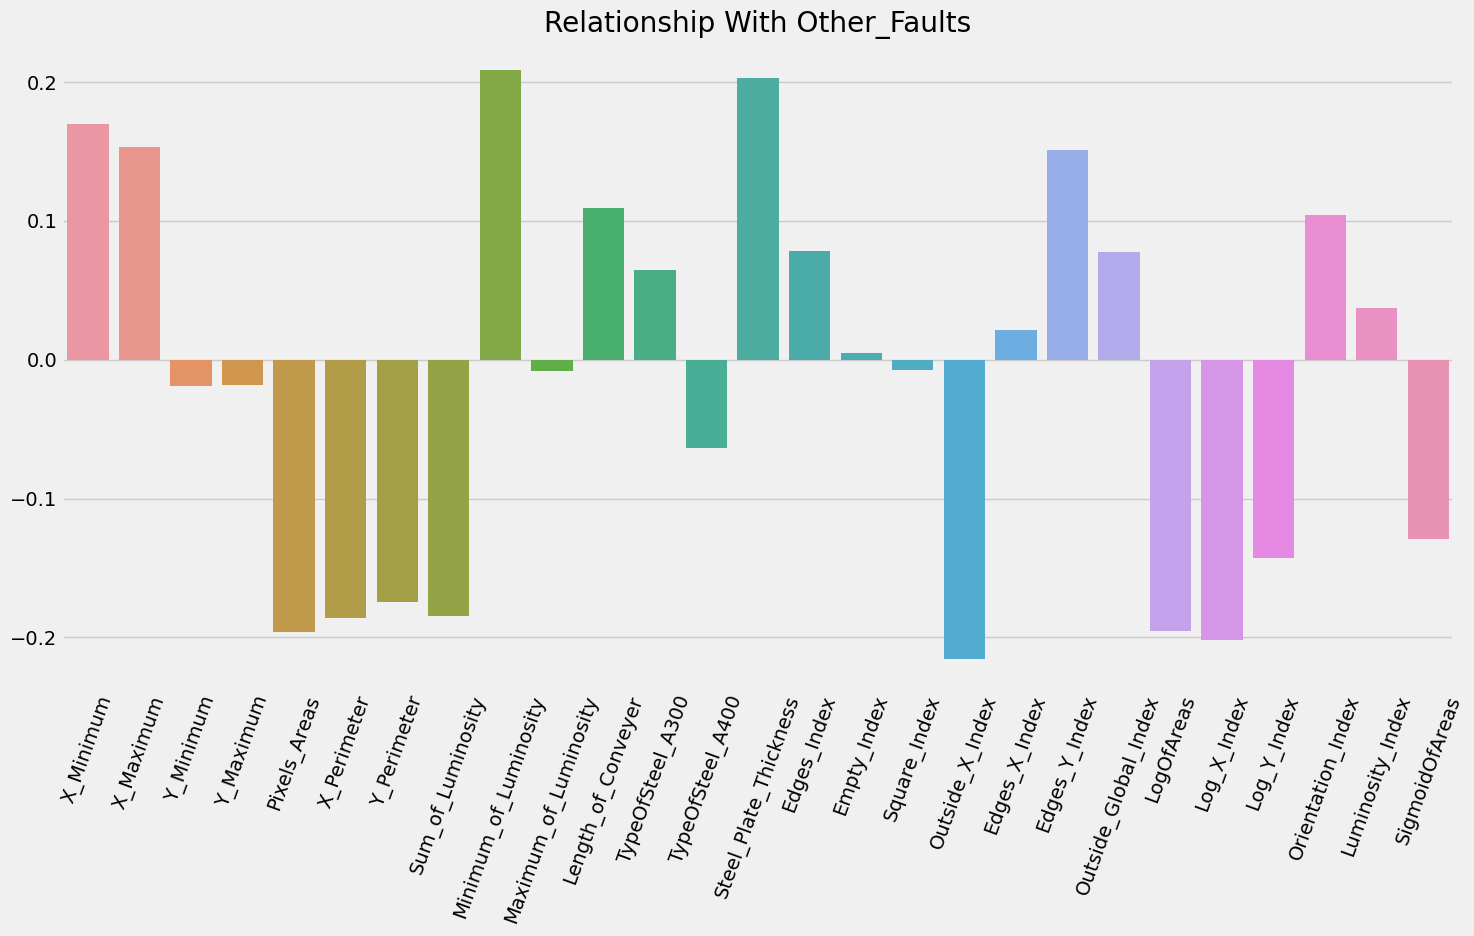

In [19]:
for column in dictFrame.index :
    plt.figure(figsize=(16, 8))
    plt.title(f"Relationship With {column}")
    sns.barplot(x=dictFrame.loc[column].index, y=dictFrame.loc[column].values)
    plt.xticks(rotation=70)
    plt.show()

In [20]:
scaling_transformer = ColumnTransformer([("StandradScaler", StandardScaler(), df.iloc[:, : 27].columns)], verbose_feature_names_out = False).set_output(transform='pandas')

In [21]:
normalizer = ColumnTransformer([("Normalizer", FunctionTransformer(np.log1p), df.columns[:27] )], verbose_feature_names_out=False).set_output(transform='pandas')

In [22]:


targets = fast_eda_target
inputs = df.iloc[ : , 0:27]


X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state =42)

In [23]:
pipe = Pipeline([
    ("Scaling", scaling_transformer),
    ("Normalization", normalizer)
])

In [24]:
X_train = pipe.fit_transform(X_train)
X_text = pipe.transform(X_test)

In [25]:
num_classes = len(np.unique(y_train))

def objective(trial, model_name):
    if model_name == 'xgboost':
        params = {
            'objective': 'multi:softmax',
            'num_class': num_classes,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 0.2),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.2),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.2),
            'min_child_weight': trial.suggest_float('min_child_weight', 1, 5),
        }
        model = XGBClassifier(**params)
    elif model_name == 'lightgbm':
        params = {
            'objective': 'multiclass',
            'num_class': num_classes,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.2),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.2),
            'min_child_weight': trial.suggest_float('min_child_weight', 1, 5),
        }
        model = LGBMClassifier(**params)
    elif model_name == 'catboost':
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 3, 10),
            'iterations': trial.suggest_int('iterations', 100, 500),
            # 'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0, 5),
        }
        model = CatBoostClassifier(**params, verbose=0)
    
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    return score

In [37]:
def plot_roc_curve(y_true, y_pred_proba):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

def run_optimization(model_name, n_trials=150):
    study = op.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=n_trials)
    best_params = study.best_params

    if model_name == 'xgboost':
        best_model = XGBClassifier(**best_params)
    elif model_name == 'lightgbm':
        best_model = LGBMClassifier(**best_params)
    elif model_name == 'catboost':
        best_model = CatBoostClassifier(**best_params, verbose=0)
    best_model.fit(X_train, y_train)

    y_pred_proba = best_model.predict_proba(X_test)

    plot_roc_curve(y_test, y_pred_proba)

    return best_params

In [38]:
best_prams_for_xgb = run_optimization('xgboost')

[I 2024-03-16 07:34:03,855] A new study created in memory with name: no-name-0c1d14ac-dd0b-466f-a9e8-eb462e607096
[I 2024-03-16 07:34:12,174] Trial 0 finished with value: 0.5955382944584596 and parameters: {'learning_rate': 0.15225513907762092, 'max_depth': 9, 'subsample': 0.7265001598270351, 'colsample_bytree': 0.7332744178614741, 'gamma': 0.18975919184858867, 'reg_alpha': 0.1829309367491036, 'reg_lambda': 0.07085169536270956, 'min_child_weight': 4.15839767740295}. Best is trial 0 with value: 0.5955382944584596.
[W 2024-03-16 07:34:13,177] Trial 1 failed with parameters: {'learning_rate': 0.020095876394855057, 'max_depth': 5, 'subsample': 0.8061468972080592, 'colsample_bytree': 0.7329580194800387, 'gamma': 0.0636394175172947, 'reg_alpha': 0.17417724398437381, 'reg_lambda': 0.08960012876509549, 'min_child_weight': 1.2043754402387288} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Li

KeyboardInterrupt: 

[I 2024-03-16 06:43:50,000] A new study created in memory with name: no-name-2d323cd7-2036-4460-80c9-d950ee276caa
[I 2024-03-16 06:44:24,328] Trial 0 finished with value: 0.5692857649086919 and parameters: {'learning_rate': 0.07106081057094243, 'depth': 7, 'iterations': 296, 'colsample_bylevel': 0.8196159250796055, 'l2_leaf_reg': 2.0895544134593917}. Best is trial 0 with value: 0.5692857649086919.
[I 2024-03-16 06:44:54,456] Trial 1 finished with value: 0.5591056739489555 and parameters: {'learning_rate': 0.1920229189488341, 'depth': 7, 'iterations': 304, 'colsample_bylevel': 0.7186663385101846, 'l2_leaf_reg': 1.367769561685392}. Best is trial 0 with value: 0.5692857649086919.
[I 2024-03-16 06:45:11,572] Trial 2 finished with value: 0.5837554389887175 and parameters: {'learning_rate': 0.15703711176171362, 'depth': 7, 'iterations': 122, 'colsample_bylevel': 0.9914197793141777, 'l2_leaf_reg': 0.562620516808186}. Best is trial 2 with value: 0.5837554389887175.
[I 2024-03-16 06:46:44,734] 

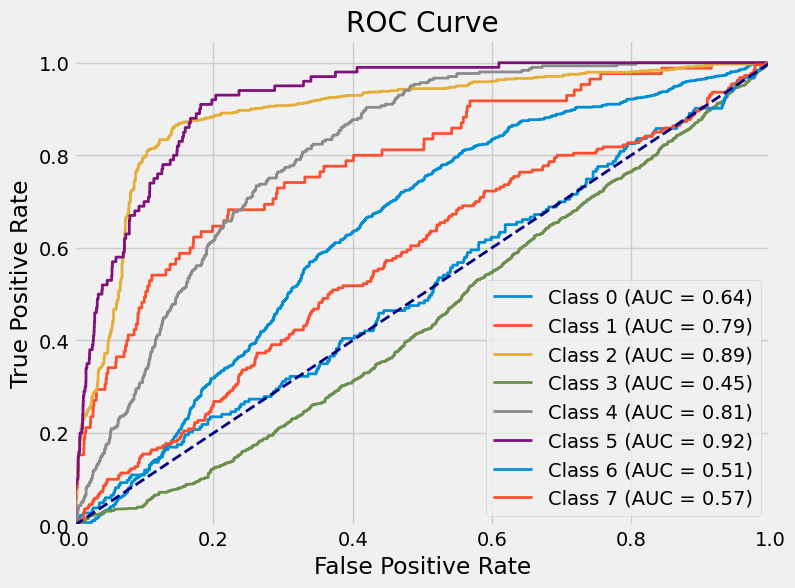

In [32]:
best_prams_for_catboost = run_optimization('catboost')

[I 2024-03-16 07:13:50,395] A new study created in memory with name: no-name-9bf919a0-7442-4208-a780-0373f09eba9d


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM

[I 2024-03-16 07:14:05,103] Trial 0 finished with value: 0.6670817102636014 and parameters: {'learning_rate': 0.1705226417326346, 'max_depth': 7, 'subsample': 0.6914413993174369, 'colsample_bytree': 0.8124884909429627, 'reg_alpha': 0.011882450470817553, 'reg_lambda': 0.14668559684681362, 'min_child_weight': 4.803364348094272}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-03-16 07:14:09,981] Trial 1 finished with value: 0.6386557820833697 and parameters: {'learning_rate': 0.011655744283748527, 'max_depth': 4, 'subsample': 0.9298992876888219, 'colsample_bytree': 0.7015804761759471, 'reg_alpha': 0.09133700351826009, 'reg_lambda': 0.13134842468410257, 'min_child_weight': 4.9585171749708925}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:13,882] Trial 2 finished with value: 0.5982637066669383 and parameters: {'learning_rate': 0.11598412108023842, 'max_depth': 5, 'subsample': 0.7176743191766206, 'colsample_bytree': 0.6833853771330136, 'reg_alpha': 0.0038271625851100223, 'reg_lambda': 0.015849614703033678, 'min_child_weight': 4.065302146019127}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:17,946] Trial 3 finished with value: 0.6444808367198069 and parameters: {'learning_rate': 0.037231004126131936, 'max_depth': 6, 'subsample': 0.6460898813029616, 'colsample_bytree': 0.6199667335017821, 'reg_alpha': 0.056459448317168426, 'reg_lambda': 0.1148907393276064, 'min_child_weight': 1.2571967108898385}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:22,276] Trial 4 finished with value: 0.5372299800063516 and parameters: {'learning_rate': 0.2963271923232304, 'max_depth': 6, 'subsample': 0.6705221451705276, 'colsample_bytree': 0.871559708040763, 'reg_alpha': 0.18595573904265164, 'reg_lambda': 0.17685711387680858, 'min_child_weight': 1.1579411306054754}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-03-16 07:14:24,352] Trial 5 finished with value: 0.573762678101519 and parameters: {'learning_rate': 0.1236206412029329, 'max_depth': 4, 'subsample': 0.9209859572102171, 'colsample_bytree': 0.6346471405613673, 'reg_alpha': 0.12827497730650966, 'reg_lambda': 0.039251882330906596, 'min_child_weight': 1.3336459932054194}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-03-16 07:14:26,915] Trial 6 finished with value: 0.5909119178276849 and parameters: {'learning_rate': 0.02971431308867599, 'max_depth': 4, 'subsample': 0.859129172678377, 'colsample_bytree': 0.9239535457932192, 'reg_alpha': 0.03098311678204151, 'reg_lambda': 0.15426906774199847, 'min_child_weight': 2.966078504525867}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:30,034] Trial 7 finished with value: 0.5996224478216046 and parameters: {'learning_rate': 0.17574585202161086, 'max_depth': 5, 'subsample': 0.6187071291720312, 'colsample_bytree': 0.9162266577320962, 'reg_alpha': 0.09705049541027462, 'reg_lambda': 0.17441572870667865, 'min_child_weight': 4.088338530395857}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2024-03-16 07:14:32,394] Trial 8 finished with value: 0.6459500466365196 and parameters: {'learning_rate': 0.11534556896625266, 'max_depth': 4, 'subsample': 0.6072524269330449, 'colsample_bytree': 0.8256067794259122, 'reg_alpha': 0.1888599703395533, 'reg_lambda': 0.0721639604732908, 'min_child_weight': 3.131331811116269}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:38,927] Trial 9 finished with value: 0.5564470296503162 and parameters: {'learning_rate': 0.16844711241946025, 'max_depth': 9, 'subsample': 0.852895865283925, 'colsample_bytree': 0.8308268524646567, 'reg_alpha': 0.02221926760002493, 'reg_lambda': 0.1444619649907586, 'min_child_weight': 1.1844495337152852}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:48,458] Trial 10 finished with value: 0.6035064337268332 and parameters: {'learning_rate': 0.23754580896257227, 'max_depth': 9, 'subsample': 0.7564761614951017, 'colsample_bytree': 0.7530930540258229, 'reg_alpha': 0.059337244160204826, 'reg_lambda': 0.07444417293228726, 'min_child_weight': 4.96176950990085}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:14:55,869] Trial 11 finished with value: 0.6311206540092077 and parameters: {'learning_rate': 0.09153751423934167, 'max_depth': 8, 'subsample': 0.6040023834337848, 'colsample_bytree': 0.991922860714957, 'reg_alpha': 0.1936322596474958, 'reg_lambda': 0.07655354812065532, 'min_child_weight': 2.509797676358286}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:04,596] Trial 12 finished with value: 0.5924216385521677 and parameters: {'learning_rate': 0.21048702781769368, 'max_depth': 7, 'subsample': 0.7049849738833747, 'colsample_bytree': 0.7851273732947297, 'reg_alpha': 0.14860974302278307, 'reg_lambda': 0.0868617113829527, 'min_child_weight': 3.971802684429858}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-03-16 07:15:09,044] Trial 13 finished with value: 0.6370749938975176 and parameters: {'learning_rate': 0.08113749276925399, 'max_depth': 3, 'subsample': 0.7754576146989463, 'colsample_bytree': 0.8382402925363919, 'reg_alpha': 0.14708703880662724, 'reg_lambda': 0.05347745133241173, 'min_child_weight': 2.1842062631191697}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:13,763] Trial 14 finished with value: 0.6124690701082207 and parameters: {'learning_rate': 0.2163662026669334, 'max_depth': 7, 'subsample': 0.6954788130166466, 'colsample_bytree': 0.7404805804823381, 'reg_alpha': 0.06921494996150754, 'reg_lambda': 0.10805882235223474, 'min_child_weight': 3.3861311329658896}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:20,007] Trial 15 finished with value: 0.599971292185258 and parameters: {'learning_rate': 0.13246450726256098, 'max_depth': 8, 'subsample': 0.6034879608934972, 'colsample_bytree': 0.7928796630457661, 'reg_alpha': 0.13299290170513153, 'reg_lambda': 0.19936639778214899, 'min_child_weight': 2.083767294662618}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:25,946] Trial 16 finished with value: 0.617878511993667 and parameters: {'learning_rate': 0.07240960339498625, 'max_depth': 10, 'subsample': 0.7443532604085803, 'colsample_bytree': 0.8898172186306107, 'reg_alpha': 0.1758532095972269, 'reg_lambda': 0.04926183957321131, 'min_child_weight': 4.47299662039023}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-03-16 07:15:28,375] Trial 17 finished with value: 0.5983282695658336 and parameters: {'learning_rate': 0.18553132239932738, 'max_depth': 3, 'subsample': 0.9981862176914098, 'colsample_bytree': 0.98106478448754, 'reg_alpha': 0.11978387663447185, 'reg_lambda': 0.013605231916014954, 'min_child_weight': 3.3899311687164744}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:32,843] Trial 18 finished with value: 0.6273292726829998 and parameters: {'learning_rate': 0.2750212209532238, 'max_depth': 5, 'subsample': 0.8150049671731363, 'colsample_bytree': 0.8152367199568041, 'reg_alpha': 0.15669425189460984, 'reg_lambda': 0.12996713130717402, 'min_child_weight': 3.4723772612243953}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:38,310] Trial 19 finished with value: 0.6542070847730881 and parameters: {'learning_rate': 0.15995573038043817, 'max_depth': 6, 'subsample': 0.6509922310162033, 'colsample_bytree': 0.7463692178590747, 'reg_alpha': 0.07960841886608507, 'reg_lambda': 0.09643231840797306, 'min_child_weight': 2.715670384369152}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:43,736] Trial 20 finished with value: 0.5928792622702156 and parameters: {'learning_rate': 0.1454361458611174, 'max_depth': 7, 'subsample': 0.6593213084139105, 'colsample_bytree': 0.703819192158382, 'reg_alpha': 0.03860604280886579, 'reg_lambda': 0.10587573114598678, 'min_child_weight': 2.6038448285996867}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:15:47,649] Trial 21 finished with value: 0.5951599493919848 and parameters: {'learning_rate': 0.1513484041870947, 'max_depth': 6, 'subsample': 0.6447767039392163, 'colsample_bytree': 0.7565415354426474, 'reg_alpha': 0.08048907505318596, 'reg_lambda': 0.09437350589273454, 'min_child_weight': 1.881316621904725}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:15:56,326] Trial 22 finished with value: 0.6124776658524752 and parameters: {'learning_rate': 0.20382378434414436, 'max_depth': 5, 'subsample': 0.6791983239451017, 'colsample_bytree': 0.8601869137648274, 'reg_alpha': 0.0014086973656066652, 'reg_lambda': 0.06130058751948297, 'min_child_weight': 2.9343415151730246}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:07,023] Trial 23 finished with value: 0.6524778988588174 and parameters: {'learning_rate': 0.10272140761427367, 'max_depth': 8, 'subsample': 0.6343665577467787, 'colsample_bytree': 0.7813770393749733, 'reg_alpha': 0.10917231915417674, 'reg_lambda': 0.12493550731946504, 'min_child_weight': 3.747134522532276}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:15,166] Trial 24 finished with value: 0.6021738907574996 and parameters: {'learning_rate': 0.23708164973199908, 'max_depth': 8, 'subsample': 0.7284356121685492, 'colsample_bytree': 0.7767107206592291, 'reg_alpha': 0.11086071615629564, 'reg_lambda': 0.163183241035083, 'min_child_weight': 4.420443819409266}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:19,859] Trial 25 finished with value: 0.6474382883409893 and parameters: {'learning_rate': 0.16188589632975728, 'max_depth': 9, 'subsample': 0.6520930985588984, 'colsample_bytree': 0.6719307959161404, 'reg_alpha': 0.04902942793529796, 'reg_lambda': 0.12393423432872264, 'min_child_weight': 3.714704421104264}. Best is trial 0 with value: 0.6670817102636014.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:27,270] Trial 26 finished with value: 0.6686876376909321 and parameters: {'learning_rate': 0.09574364901112711, 'max_depth': 8, 'subsample': 0.7952674717207645, 'colsample_bytree': 0.7310091390702826, 'reg_alpha': 0.07859257761900842, 'reg_lambda': 0.142678142284747, 'min_child_weight': 4.512850451211086}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:32,016] Trial 27 finished with value: 0.6531393075375393 and parameters: {'learning_rate': 0.062347485939301714, 'max_depth': 7, 'subsample': 0.8166111119029847, 'colsample_bytree': 0.7236411748546502, 'reg_alpha': 0.07845833784669035, 'reg_lambda': 0.1441068482930575, 'min_child_weight': 4.511665804577568}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:16:36,498] Trial 28 finished with value: 0.6151965733994191 and parameters: {'learning_rate': 0.1896593045339804, 'max_depth': 10, 'subsample': 0.7877684689436768, 'colsample_bytree': 0.6690676346801362, 'reg_alpha': 0.02104892598943904, 'reg_lambda': 0.19232562172151013, 'min_child_weight': 4.723944035601592}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM

[I 2024-03-16 07:16:43,133] Trial 29 finished with value: 0.6326132916668249 and parameters: {'learning_rate': 0.1373931846317132, 'max_depth': 6, 'subsample': 0.8543892683400038, 'colsample_bytree': 0.7158960850173111, 'reg_alpha': 0.08917575998193206, 'reg_lambda': 0.14211671090378927, 'min_child_weight': 4.824095740772147}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:48,008] Trial 30 finished with value: 0.6204968886994702 and parameters: {'learning_rate': 0.053491782016407696, 'max_depth': 7, 'subsample': 0.9504047787386207, 'colsample_bytree': 0.6401562817367797, 'reg_alpha': 0.07080504178747582, 'reg_lambda': 0.16714578654337764, 'min_child_weight': 2.585335396808972}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:16:54,180] Trial 31 finished with value: 0.6457542235290241 and parameters: {'learning_rate': 0.06257038907890689, 'max_depth': 7, 'subsample': 0.8238009650722753, 'colsample_bytree': 0.7259559113016829, 'reg_alpha': 0.0827627168848213, 'reg_lambda': 0.14282513290283544, 'min_child_weight': 4.498139606261206}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:16:57,824] Trial 32 finished with value: 0.6567264854253188 and parameters: {'learning_rate': 0.023926787857037564, 'max_depth': 8, 'subsample': 0.901924404650419, 'colsample_bytree': 0.689444114063976, 'reg_alpha': 0.07002155428336215, 'reg_lambda': 0.15202678793477767, 'min_child_weight': 4.2236830083348265}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from sco

[I 2024-03-16 07:17:02,829] Trial 33 finished with value: 0.6371648162120693 and parameters: {'learning_rate': 0.030496384442464816, 'max_depth': 8, 'subsample': 0.900988418725094, 'colsample_bytree': 0.6897933486412593, 'reg_alpha': 0.04751241356638022, 'reg_lambda': 0.11410235330138617, 'min_child_weight': 4.210847184174832}. Best is trial 26 with value: 0.6686876376909321.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:17:06,662] Trial 34 finished with value: 0.6808480226562912 and parameters: {'learning_rate': 0.016768576078108947, 'max_depth': 9, 'subsample': 0.9706159662316882, 'colsample_bytree': 0.6021086627612898, 'reg_alpha': 0.01540882485074406, 'reg_lambda': 0.18410908261144207, 'min_child_weight': 4.999511378103153}. Best is trial 34 with value: 0.6808480226562912.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:17:10,705] Trial 35 finished with value: 0.681849109115408 and parameters: {'learning_rate': 0.016818571641362454, 'max_depth': 9, 'subsample': 0.9688448857881825, 'colsample_bytree': 0.6029650427643047, 'reg_alpha': 0.015027362233848443, 'reg_lambda': 0.18639859455059143, 'min_child_weight': 4.763939183816242}. Best is trial 35 with value: 0.681849109115408.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:17:16,226] Trial 36 finished with value: 0.6789901240859482 and parameters: {'learning_rate': 0.017879469071591075, 'max_depth': 9, 'subsample': 0.9936649046250028, 'colsample_bytree': 0.6216529573823374, 'reg_alpha': 0.01529575645980157, 'reg_lambda': 0.18588988960706151, 'min_child_weight': 4.703881429447875}. Best is trial 35 with value: 0.681849109115408.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:17:21,077] Trial 37 finished with value: 0.6714058997727458 and parameters: {'learning_rate': 0.013544915535184499, 'max_depth': 9, 'subsample': 0.99606328230386, 'colsample_bytree': 0.6023584791104504, 'reg_alpha': 0.010915196394341645, 'reg_lambda': 0.18371609150245843, 'min_child_weight': 4.742066288935937}. Best is trial 35 with value: 0.681849109115408.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:17:27,399] Trial 38 finished with value: 0.6637307157234127 and parameters: {'learning_rate': 0.01105242489928625, 'max_depth': 10, 'subsample': 0.9929815051629023, 'colsample_bytree': 0.6091879386444681, 'reg_alpha': 0.013152836249119539, 'reg_lambda': 0.18622542153493474, 'min_child_weight': 4.741701952472907}. Best is trial 35 with value: 0.681849109115408.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:17:34,734] Trial 39 finished with value: 0.6529456580922952 and parameters: {'learning_rate': 0.0456407745226865, 'max_depth': 9, 'subsample': 0.9677238787158807, 'colsample_bytree': 0.6012531829008257, 'reg_alpha': 0.013796877758370792, 'reg_lambda': 0.17485870006371107, 'min_child_weight': 4.945132233542322}. Best is trial 35 with value: 0.681849109115408.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:17:49,114] Trial 40 finished with value: 0.683750023606263 and parameters: {'learning_rate': 0.01939542639074135, 'max_depth': 9, 'subsample': 0.9737717449797294, 'colsample_bytree': 0.6457803123596887, 'reg_alpha': 0.0322494381988756, 'reg_lambda': 0.18439027625544652, 'min_child_weight': 4.664167070848977}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:02,120] Trial 41 finished with value: 0.6749532089494594 and parameters: {'learning_rate': 0.0189834550372628, 'max_depth': 9, 'subsample': 0.9705389768406751, 'colsample_bytree': 0.6330334499340051, 'reg_alpha': 0.031018545340686654, 'reg_lambda': 0.18592331732832623, 'min_child_weight': 4.681289536835089}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:10,079] Trial 42 finished with value: 0.678272554027875 and parameters: {'learning_rate': 0.04104923015764865, 'max_depth': 10, 'subsample': 0.9631564918617552, 'colsample_bytree': 0.640804851207346, 'reg_alpha': 0.03319713987342797, 'reg_lambda': 0.19865020654881135, 'min_child_weight': 4.338644255718117}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:15,617] Trial 43 finished with value: 0.652421246765521 and parameters: {'learning_rate': 0.04069234794985894, 'max_depth': 10, 'subsample': 0.932648243343387, 'colsample_bytree': 0.6563179885380077, 'reg_alpha': 0.031116996533978453, 'reg_lambda': 0.19672400451012317, 'min_child_weight': 4.295774115786436}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:23,768] Trial 44 finished with value: 0.6598524183858245 and parameters: {'learning_rate': 0.037256727643631755, 'max_depth': 10, 'subsample': 0.972154174545098, 'colsample_bytree': 0.6270392884609205, 'reg_alpha': 0.02409529105234237, 'reg_lambda': 0.16189778092772963, 'min_child_weight': 4.990318477414551}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:30,729] Trial 45 finished with value: 0.6717480591075995 and parameters: {'learning_rate': 0.05089893204364217, 'max_depth': 9, 'subsample': 0.9439009602742222, 'colsample_bytree': 0.650644805913526, 'reg_alpha': 0.043742425755325665, 'reg_lambda': 0.17695331895017952, 'min_child_weight': 3.946788170997528}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:38,557] Trial 46 finished with value: 0.6794214314808263 and parameters: {'learning_rate': 0.026676126890538446, 'max_depth': 10, 'subsample': 0.8866394408898375, 'colsample_bytree': 0.619950900055986, 'reg_alpha': 0.00015830453519255147, 'reg_lambda': 0.17096987219068227, 'min_child_weight': 4.630581115566017}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

[I 2024-03-16 07:18:43,336] Trial 47 finished with value: 0.677220603236579 and parameters: {'learning_rate': 0.025887581788180056, 'max_depth': 9, 'subsample': 0.9151473877310984, 'colsample_bytree': 0.6189159587438792, 'reg_alpha': 0.0035038393914714537, 'reg_lambda': 0.16934419384424598, 'min_child_weight': 4.633685871743987}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:18:47,747] Trial 48 finished with value: 0.6332459196423811 and parameters: {'learning_rate': 0.07700249839860983, 'max_depth': 9, 'subsample': 0.8915904698834181, 'colsample_bytree': 0.6661561777349774, 'reg_alpha': 0.016735329809381774, 'reg_lambda': 0.15434197567797153, 'min_child_weight': 4.131196375343676}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.4920

[I 2024-03-16 07:18:52,560] Trial 49 finished with value: 0.6612103826951978 and parameters: {'learning_rate': 0.011420931377144962, 'max_depth': 10, 'subsample': 0.871545283452663, 'colsample_bytree': 0.621720831646692, 'reg_alpha': 0.058687584479899135, 'reg_lambda': 0.024988729634909834, 'min_child_weight': 4.864146932903286}. Best is trial 40 with value: 0.683750023606263.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5072
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.727709
[LightGBM] [Info] Start training from score -1.082355
[LightGBM] [Info] Start training from score -2.580880
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.186873
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Warning

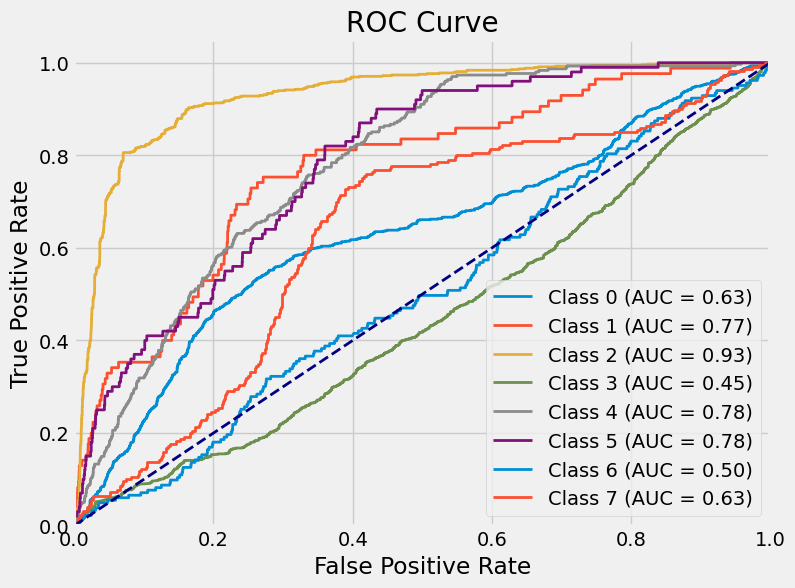

In [33]:
best_prams_for_lgbm = run_optimization('lightgbm')

In [39]:
best_prams_for_catboost1 = best_prams_for_catboost

In [41]:
best_prams_for_catboost1


{'learning_rate': 0.07907597413972103,
 'depth': 3,
 'iterations': 405,
 'colsample_bylevel': 0.7059877852136022,
 'l2_leaf_reg': 3.5191897851493215}

In [42]:
test_df = pd.read_csv('data/test.csv', index_col=[0])

In [48]:
inputs = pipe.fit_transform(inputs)
test_df = pipe.transform(test_df)